In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ufun import *



savedata_pre='zs_0.800000000000000_-0.200000000000000_-1.000000000000000_1.000000000000000_0.000000000000000__chi-5.0_numbeta1'


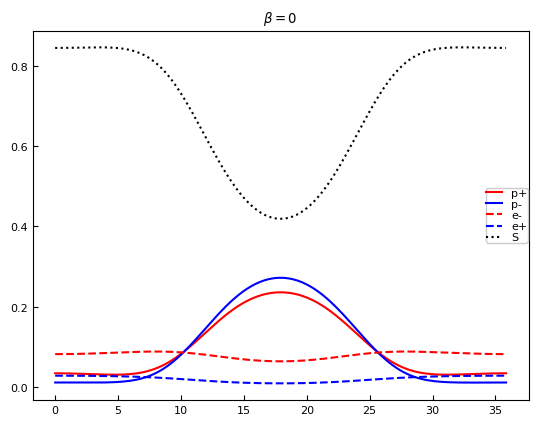

step=193985.0
total_energy=2.4479364406599
incomp=array([-5.55111512e-16])
phimeandiff=array([-8.32667268e-17,  6.93889390e-17,  1.11022302e-16, -6.93889390e-18,
        4.44089210e-16])
charge=array([1.87350135e-16])
totale=2.447936440659859
Lbetas=array([36.12201837])
[0]
unique_list=[0]
nphase=1


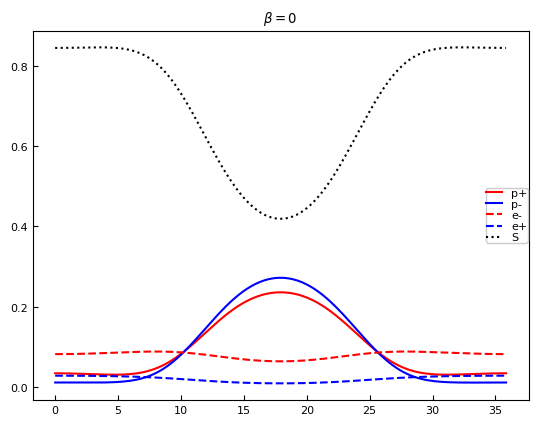

savedata_pre='zs_0.800000000000000_-0.200000000000000_-1.000000000000000_1.000000000000000_0.000000000000000__chi-5.0_numbeta2'


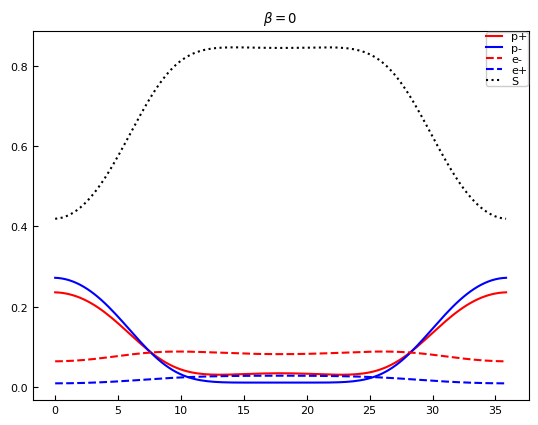

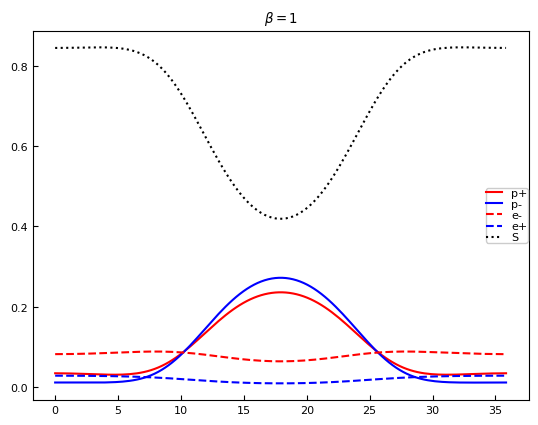

step=194081.0
total_energy=2.4479364406603
incomp=array([ 6.31887875e-11, -6.32214281e-11])
phimeandiff=array([-4.44089210e-16, -5.68989300e-16, -4.44089210e-16, -1.11022302e-16,
       -3.10862447e-15])
charge=array([ 4.09866585e-13, -4.10293327e-13])
totale=2.4479364406603406
Lbetas=array([36.12203614, 36.12200121])
[0]
unique_list=[0]
nphase=1


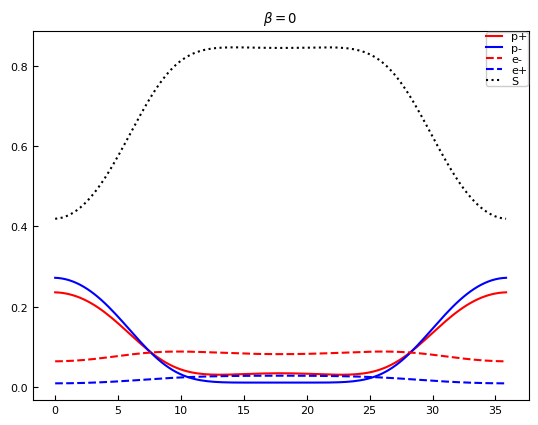

savedata_pre='zs_0.800000000000000_-0.200000000000000_-1.000000000000000_1.000000000000000_0.000000000000000__chi-5.0_numbeta4'


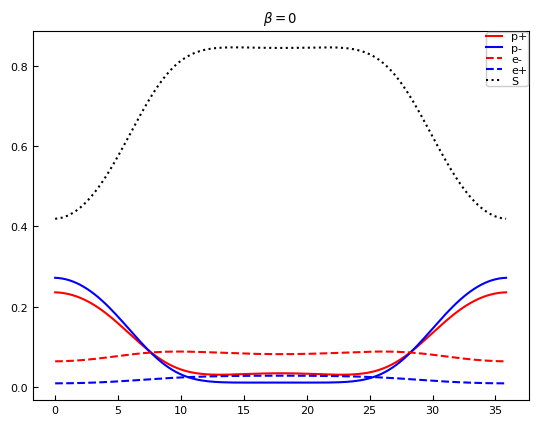

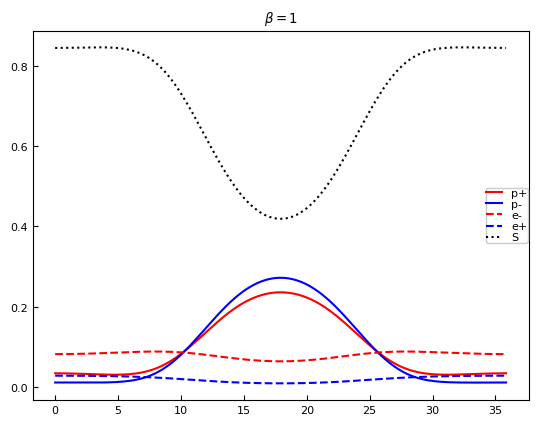

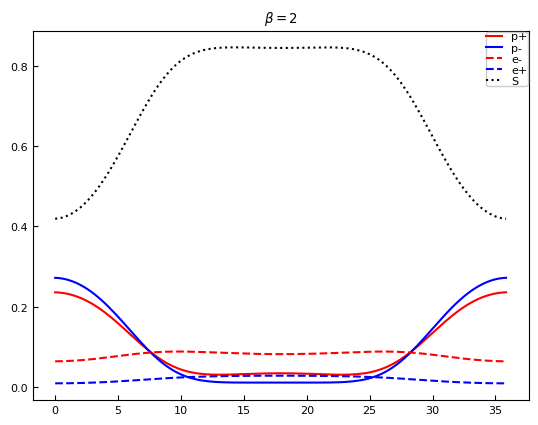

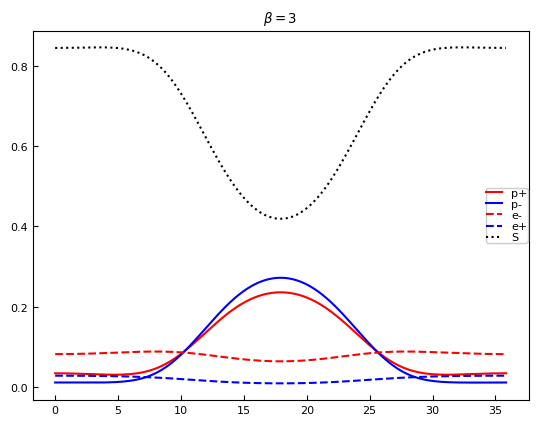

step=194048.0
total_energy=2.4479364406602
incomp=array([-4.14477341e-11, -1.37450051e-11,  9.33946254e-11, -3.82479604e-11])
phimeandiff=array([-1.24900090e-15, -1.08246745e-15, -7.63278329e-16, -1.70002901e-16,
       -7.10542736e-15])
charge=array([-2.68680911e-13, -8.90711116e-14,  6.06112383e-13, -2.47926679e-13])
totale=2.447936440660192
Lbetas=array([36.12200712, 36.12201478, 36.12204438, 36.12200801])
[0]
unique_list=[0]
nphase=1


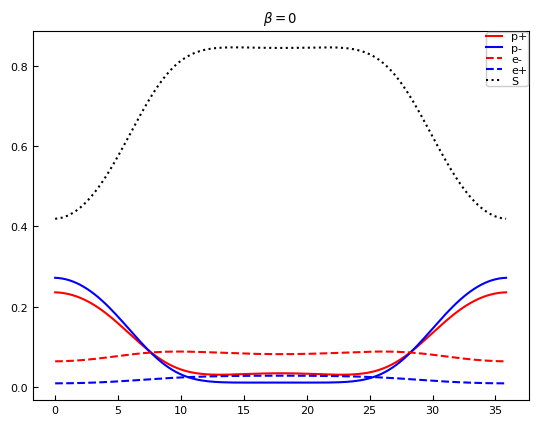

In [4]:

flag_one_compartment=True
flag_two_compartment=True
flag_four_compartment=True

flag_one_coord=True


np.set_printoptions(precision=8)
for chi in [-5.0]:
    for zp in [0.8]:
        for zm in [-0.2]:
            for num_beta in [1,2,4]:

                if(num_beta==1 and flag_one_compartment==False):
                    continue

                if(num_beta==2 and flag_two_compartment==False):
                    continue

                if(num_beta==4 and flag_four_compartment==False):
                    continue


                num_comps=5
                # num_beta=2
                num_coord=128

                # chi=-5
                chis=np.zeros((num_comps,num_comps))
                chis[0,1]=chis[1,0]=chi
                chis-=np.min(chis)

                

                Ls=np.array([10.,10.,1.,1.,1.])

                zs=np.array([zp ,zm, -1.0 ,1.0, 0.0])

                #### phi_means for ions is controlled by neutral charge 
                phi_means=np.array([0.1,0.1,0,0,0])
                phi_means[2]=-zs[0]*phi_means[0]/zs[2]
                phi_means[3]=-zs[1]*phi_means[1]/zs[3]
                phi_means[4]=1-phi_means[:4].sum()
                # print(f"total charge={np.sum(zs*phi_means)}")


                kappas=np.array([1.,1.,1.,1.,0.])*10
                v=100
                # [file filenameomega || random amplitude] 
                omega_type="random"
                omega_value=5.0
                steps_inner1= 100001
                steps_inner2= 1000001
                acceptance_omega= 0.001
                acceptance_J= 0.001
                acceptance_Lbeta= 10
                acceptance_zeta= 10
                # [file filenameJs||random amplitude] 
                Js_type="random"
                Js_value=0.0

                # [file filenameLbetas||equal valueL] 
                Lbeta_type="equal"
                Lbeta_value=30

                # [file filenamezetas||equal valuezeta] 
                zetas_type="equal"
                zetas_value=0.0

                flag_C= "true"
                C= 100.0

                # [file filenameps||equal valuep]
                ps_type="equal"
                ps_value=1.0

                flag_zetas= "true"
                flag_ps= "false"

                flag_save_separate="true"

                threshold_incomp=1e-9
                threshold_omega=1e-7
                threshold_J=1e-6
                threshold_Lbeta=1e-8
                threshold_zeta=1e-7

                ###convert vectors to strings
                chis_str=" "
                phi_means_str=" "
                Ls_str=" "
                zs_str=" "
                kappas_str=" "
                for i in range(num_comps):
                    phi_means_str=phi_means_str+f"{phi_means[i]:.15f} "
                    Ls_str=Ls_str+f"{Ls[i]:.15f} "
                    zs_str=zs_str+f"{zs[i]:.15f} "
                    kappas_str=kappas_str+f"{kappas[i]:.15f} "
                for i in range(num_comps):
                    for j in range(num_comps):
                        chis_str=chis_str+f"{chis[i,j]:.15f} "


                savedata_pre= f"{num_comps}_{num_beta}_{num_coord}_{phi_means_str}_{chis_str}_{Ls_str}_{zs_str}_{kappas_str}_{v}_{omega_type}_{omega_value}_{steps_inner1}_{steps_inner2}_{acceptance_omega}_{acceptance_J}_{acceptance_Lbeta}_{acceptance_zeta}_{Js_type}_{Js_value}_{Lbeta_type}_{Lbeta_value}_{zetas_type}_{zetas_value}_{flag_C}_{C}_{ps_type}_{ps_value}_{flag_zetas}_{flag_ps}_{flag_save_separate}_{threshold_incomp}_{threshold_omega}_{threshold_J}_{threshold_Lbeta}_{threshold_zeta}"

                # import re
                # savedata_pre=re.sub(' +','_',savedata_pre)

                savedata_pre= f"zs{zs_str}_chi{chi}_numbeta{num_beta}"
                savedata_pre='_'.join(savedata_pre.split(' '))

                print(f"{savedata_pre=}")

                savedata_folder='../submit/data_example/'

                filename=f'{savedata_folder+savedata_pre}_alldata.txt'
                Lbetas,omegas,phis,psi,Js,total_energy,errors,step=analyze_from_filename(filename,num_comps,num_beta,num_coord)
                print(f"{step=}")
                print(f"{total_energy=}")

                entropyterm, chiterm, psizsphiterm, kappaterm,nablapsiterm, zeroterm, totale, omega_temp=check_eq(phi_means,chis,Ls,zs,kappas,v,omegas,phis,psi,Js,Lbetas)
                print(f"{totale=}")

                # Lbetas[0]+=0.01
                print(f"{Lbetas=}")
                newphis,newpsi,newJs,unique_list,nphase=get_phases(phi_means,chis,Ls,zs,kappas,v,omegas,phis,psi,Js,Lbetas)
                print(f"{unique_list=}")
                print(f"{nphase=}")
                

                plot_phis(newphis,Lbetas[unique_list])


                # command=f"OMP_NUM_THREADS=1; qsub -S /bin/bash -b y -o out/out{savedata_pre}.txt -e err/err{savedata_pre}.txt -q teutates.q -N recon0 -cwd {exe} {num_comps} {num_beta} {num_coord} {phi_means_str} {chis_str} {Ls_str} {zs_str} {kappas_str} {v} {omega_type} {omega_value} {steps_inner1} {steps_inner2} {acceptance_omega} {acceptance_J} {acceptance_Lbeta} {acceptance_zeta} {Js_type} {Js_value} {Lbeta_type} {Lbeta_value} {zetas_type} {zetas_value} {flag_C} {C} {ps_type} {ps_value} {flag_zetas} {flag_ps} {savedata_folder+savedata_pre} {flag_save_separate} {threshold_incomp} {threshold_omega} {threshold_J} {threshold_Lbeta} {threshold_zeta}"

                # exe='../src/solve_gibbs_with_input.out'
                # command=f"{exe} {num_comps} {num_beta} {num_coord} {phi_means_str} {chis_str} {Ls_str} {zs_str} {kappas_str} {v} {omega_type} {omega_value} {steps_inner1} {steps_inner2} {acceptance_omega} {acceptance_J} {acceptance_Lbeta} {acceptance_zeta} {Js_type} {Js_value} {Lbeta_type} {Lbeta_value} {zetas_type} {zetas_value} {flag_C} {C} {ps_type} {ps_value} {flag_zetas} {flag_ps} {savedata_folder+savedata_pre} {flag_save_separate} {threshold_incomp} {threshold_omega} {threshold_J} {threshold_Lbeta} {threshold_zeta}"

                # print("command=")
                # print(command)


                # # command=f"./solve_gibbs_with_input.out {num_comps} {num_beta} {num_coord} {phi_means_str} {chi} {Ls_str} {zs_str} {kappas_str} {v} {omega_type} {omega_value} {steps_inner1} {steps_inner2} {acceptance_omega} {acceptance_J} {acceptance_Lbeta} {acceptance_zeta} {Js_type} {Js_value} {Lbeta_type} {Lbeta_value} {zetas_type} {zetas_value} {flag_C} {C} {ps_type} {ps_value} {flag_zetas} {flag_ps} {savedata_folder+savedata_pre} {flag_save_separate}"# > {savedata_folder+savedata_pre}.log"

                # os.system(command)

In [ ]:
plt.plot()

savedata_pre='zs_0.800000000000000_-0.600000000000000_-1.000000000000000_1.000000000000000_0.000000000000000__chi-5.0_numbeta1'


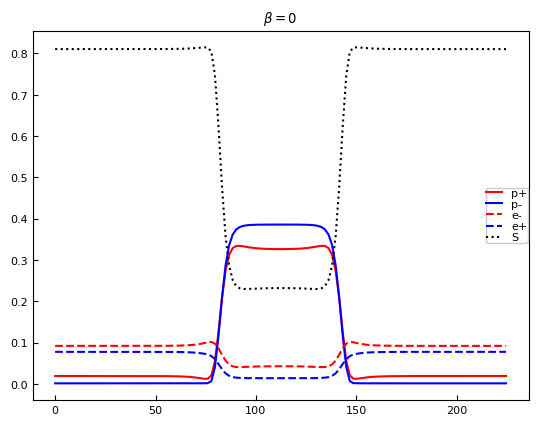

step=1000001.0
total_energy=2.4312348433477
incomp=array([2.22044605e-16])
phimeandiff=array([ 8.32667268e-17, -1.38777878e-16,  8.32667268e-17,  1.38777878e-17,
       -4.44089210e-16])
charge=array([-8.32667268e-17])
totale=2.43123484334771
Lbetas=array([226.34209885])
[0]
unique_list=[0]
nphase=1
newJs=[1.0]


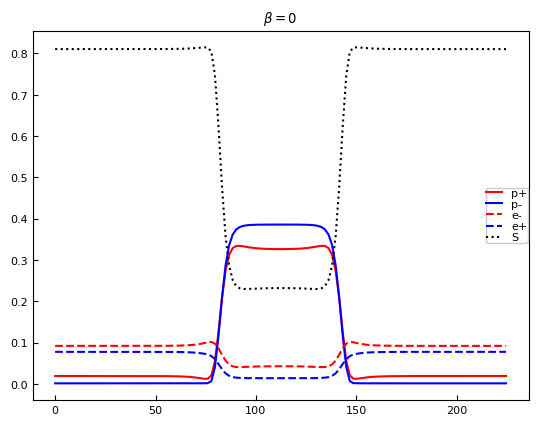

savedata_pre='zs_0.800000000000000_-0.600000000000000_-1.000000000000000_1.000000000000000_0.000000000000000__chi-5.0_numbeta2'


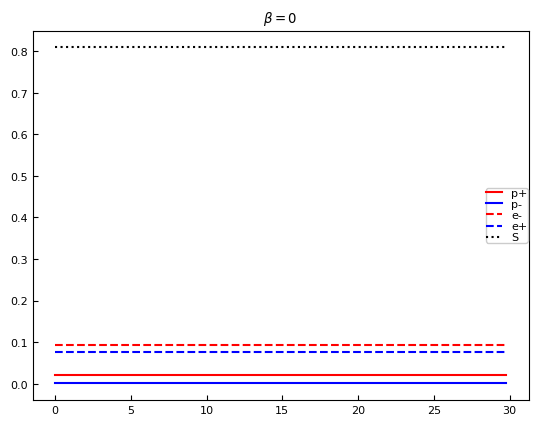

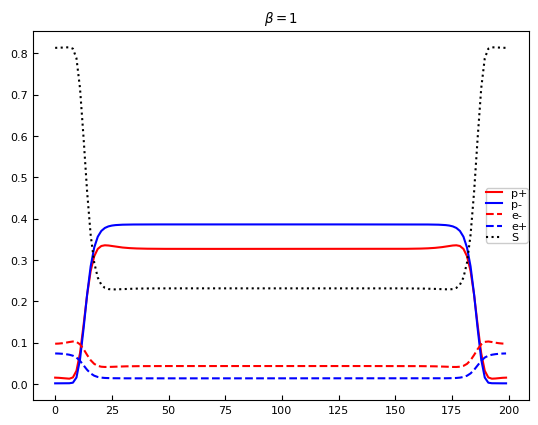

step=1000001.0
total_energy=2.4301434956828
incomp=array([-1.17981624e-06,  2.73377993e-06])
phimeandiff=array([ 1.40736344e-08,  1.75151295e-08, -2.19666570e-09, -2.94649503e-09,
       -2.64453763e-08])
charge=array([-2.70769406e-09,  6.27406156e-09])
totale=2.43014349568279
Lbetas=array([ 30.        , 200.47854827])
[0, 1]
unique_list=[0, 1]
nphase=2
newJs=[1.3970680785818, 0.60293192141817]


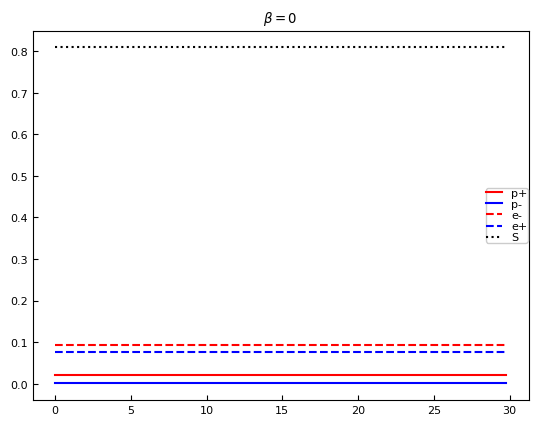

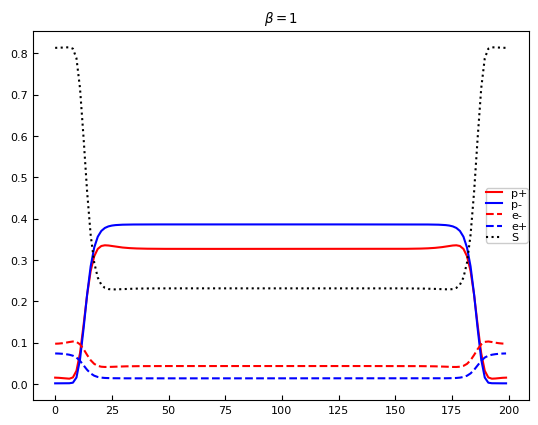

savedata_pre='zs_0.800000000000000_-0.600000000000000_-1.000000000000000_1.000000000000000_0.000000000000000__chi-5.0_numbeta4'


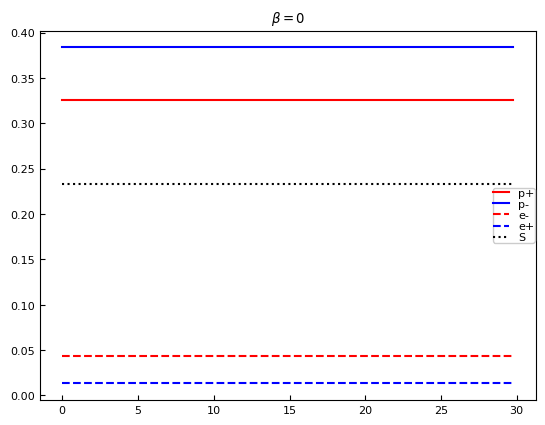

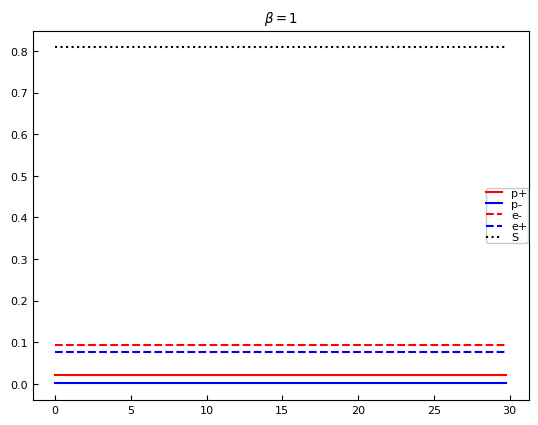

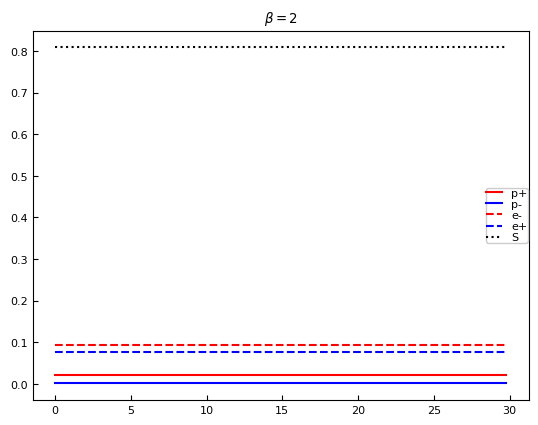

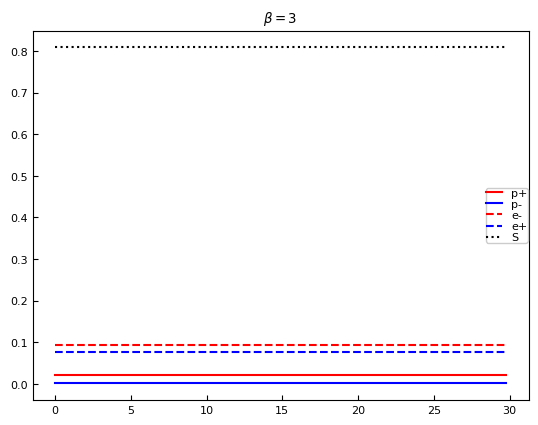

step=81850.0
total_energy=2.4295863210479
incomp=array([-9.99859084e-10,  3.48263418e-10,  3.48263418e-10,  3.48263418e-10])
phimeandiff=array([-1.81361870e-12, -2.27495800e-12,  2.90892310e-13,  3.74519860e-13,
        3.42614825e-12])
charge=array([-2.53146462e-13,  9.11354325e-14,  9.11354325e-14,  9.11354325e-14])
totale=2.429586321047868
Lbetas=array([30., 30., 30., 30.])
[0, 1]
unique_list=[0, 1]
nphase=2
newJs=[1.0333081477965, 2.9666918522034598]


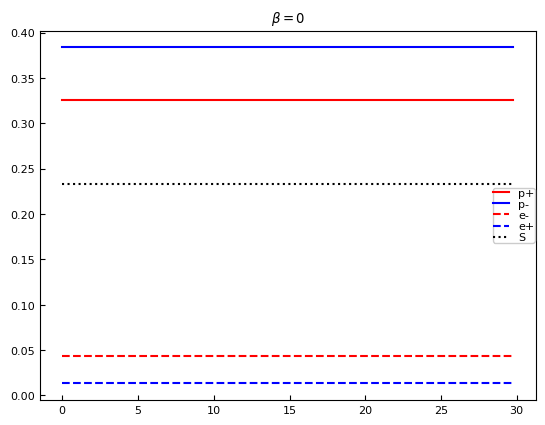

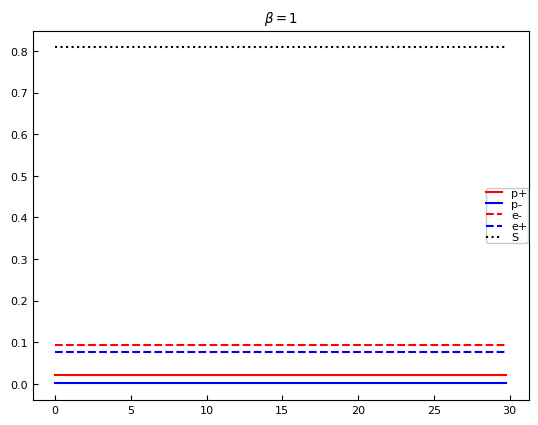

savedata_pre='zs_0.800000000000000_-0.600000000000000_-1.000000000000000_1.000000000000000_0.000000000000000__chi-5.0_numbeta8'


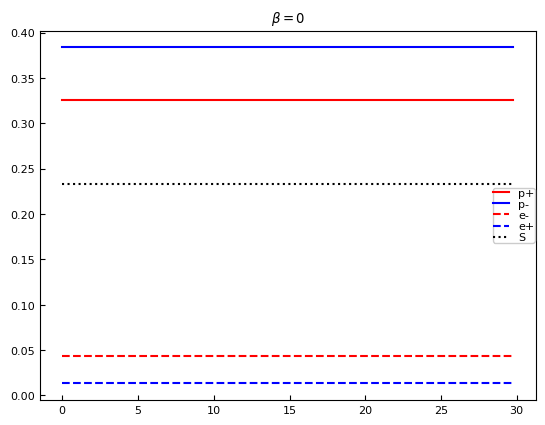

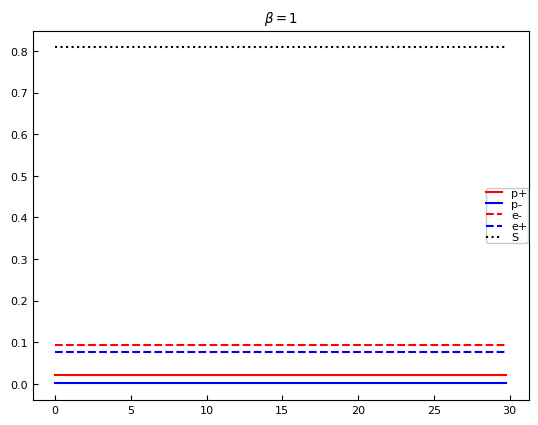

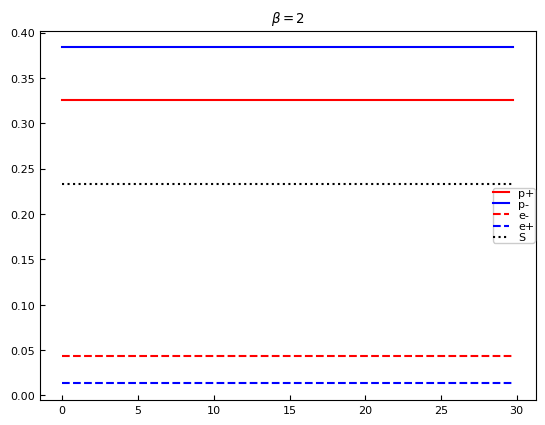

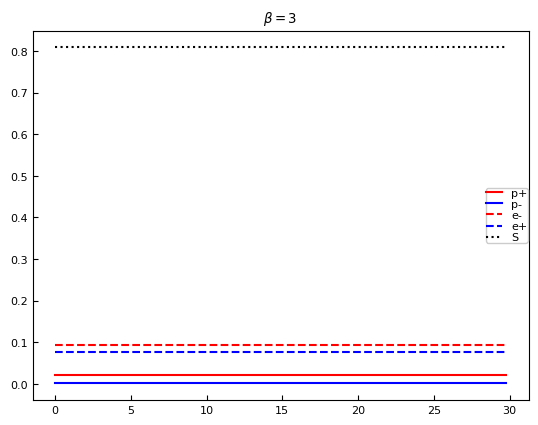

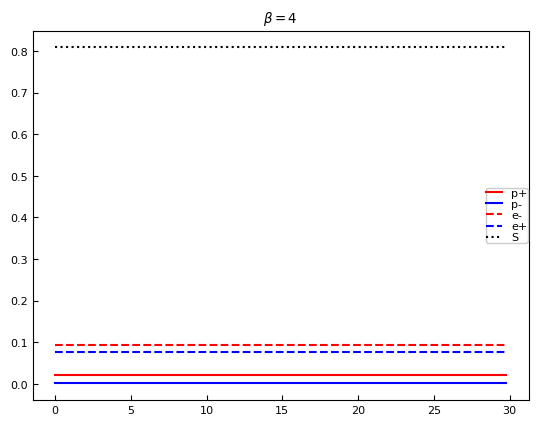

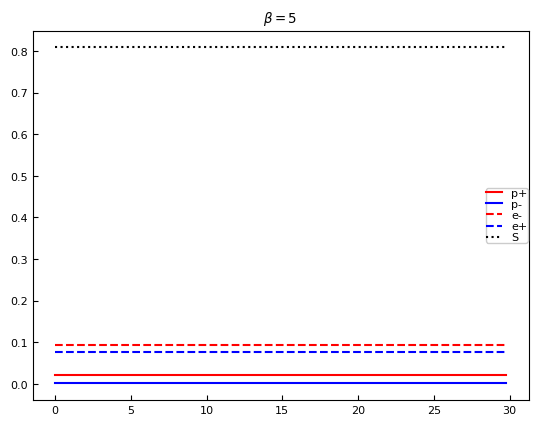

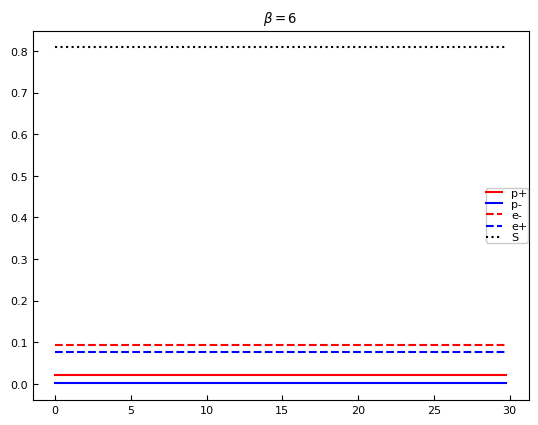

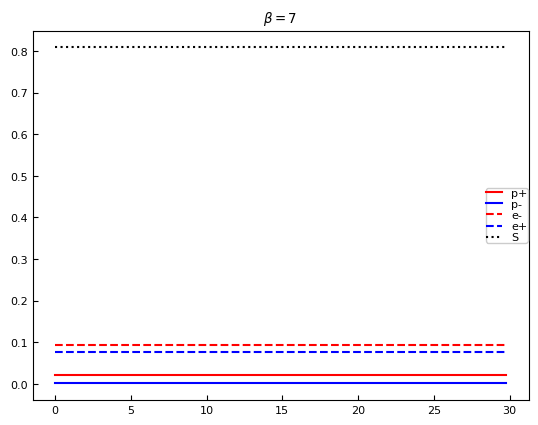

step=81849.0
total_energy=2.429586321048
incomp=array([-1.00000297e-09,  3.48320484e-10, -1.00000297e-09,  3.48320484e-10,
        3.48320484e-10,  3.48320484e-10,  3.48320484e-10,  3.48320484e-10])
phimeandiff=array([-1.81575588e-12, -2.28363162e-12,  2.91294766e-13,  3.74665576e-13,
        3.42248452e-12])
charge=array([-2.70939521e-13,  9.31060784e-14, -2.70939521e-13,  9.31060784e-14,
        9.31060784e-14,  9.31060784e-14,  9.31060784e-14,  9.31060784e-14])
totale=2.42958632104795
Lbetas=array([30., 30., 30., 30., 30., 30., 30., 30.])
[0, 1]
unique_list=[0, 1]
nphase=2
newJs=[2.0666162955454, 5.93338370445459]


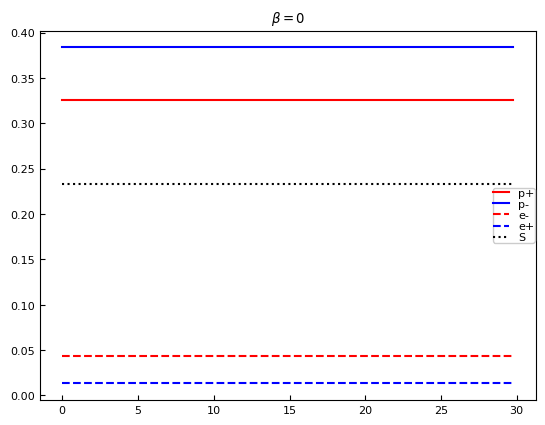

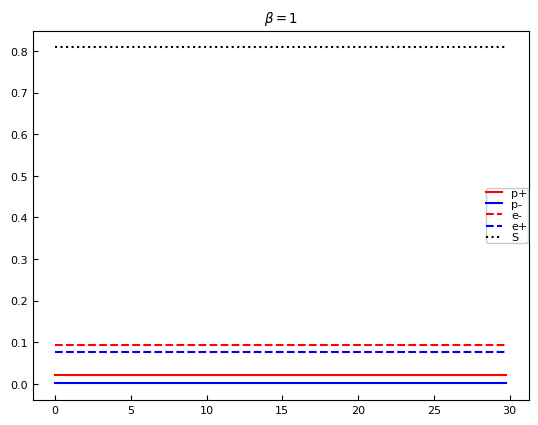

In [10]:

flag_one_compartment=True
flag_two_compartment=True
flag_four_compartment=True
flag_eight_compartment=True
flag_one_coord=True


np.set_printoptions(precision=8)
for chi in [-5.0]:
    for zp in [0.8]:
        for zm in [-0.6]:
            for num_beta in [1,2,4,8]:

                if(num_beta==1 and flag_one_compartment==False):
                    continue

                if(num_beta==2 and flag_two_compartment==False):
                    continue

                if(num_beta==4 and flag_four_compartment==False):
                    continue

                if(num_beta==8 and flag_eight_compartment==False):
                    continue


                num_comps=5
                # num_beta=2
                num_coord=128

                # chi=-5
                chis=np.zeros((num_comps,num_comps))
                chis[0,1]=chis[1,0]=chi
                chis-=np.min(chis)

                

                Ls=np.array([10.,10.,1.,1.,1.])

                zs=np.array([zp ,zm, -1.0 ,1.0, 0.0])

                #### phi_means for ions is controlled by neutral charge 
                phi_means=np.array([0.1,0.1,0,0,0])
                phi_means[2]=-zs[0]*phi_means[0]/zs[2]
                phi_means[3]=-zs[1]*phi_means[1]/zs[3]
                phi_means[4]=1-phi_means[:4].sum()
                # print(f"total charge={np.sum(zs*phi_means)}")


                kappas=np.array([1.,1.,1.,1.,0.])*10
                v=100
                # [file filenameomega || random amplitude] 
                omega_type="random"
                omega_value=5.0
                steps_inner1= 100001
                steps_inner2= 1000001
                acceptance_omega= 0.001
                acceptance_J= 0.001
                acceptance_Lbeta= 10
                acceptance_zeta= 10
                # [file filenameJs||random amplitude] 
                Js_type="random"
                Js_value=0.0

                # [file filenameLbetas||equal valueL] 
                Lbeta_type="equal"
                Lbeta_value=30

                # [file filenamezetas||equal valuezeta] 
                zetas_type="equal"
                zetas_value=0.0

                flag_C= "true"
                C= 100.0

                # [file filenameps||equal valuep]
                ps_type="equal"
                ps_value=1.0

                flag_zetas= "true"
                flag_ps= "false"

                flag_save_separate="true"

                threshold_incomp=1e-9
                threshold_omega=1e-7
                threshold_J=1e-6
                threshold_Lbeta=1e-8
                threshold_zeta=1e-7

                ###convert vectors to strings
                chis_str=" "
                phi_means_str=" "
                Ls_str=" "
                zs_str=" "
                kappas_str=" "
                for i in range(num_comps):
                    phi_means_str=phi_means_str+f"{phi_means[i]:.15f} "
                    Ls_str=Ls_str+f"{Ls[i]:.15f} "
                    zs_str=zs_str+f"{zs[i]:.15f} "
                    kappas_str=kappas_str+f"{kappas[i]:.15f} "
                for i in range(num_comps):
                    for j in range(num_comps):
                        chis_str=chis_str+f"{chis[i,j]:.15f} "


                savedata_pre= f"{num_comps}_{num_beta}_{num_coord}_{phi_means_str}_{chis_str}_{Ls_str}_{zs_str}_{kappas_str}_{v}_{omega_type}_{omega_value}_{steps_inner1}_{steps_inner2}_{acceptance_omega}_{acceptance_J}_{acceptance_Lbeta}_{acceptance_zeta}_{Js_type}_{Js_value}_{Lbeta_type}_{Lbeta_value}_{zetas_type}_{zetas_value}_{flag_C}_{C}_{ps_type}_{ps_value}_{flag_zetas}_{flag_ps}_{flag_save_separate}_{threshold_incomp}_{threshold_omega}_{threshold_J}_{threshold_Lbeta}_{threshold_zeta}"

                # import re
                # savedata_pre=re.sub(' +','_',savedata_pre)

                savedata_pre= f"zs{zs_str}_chi{chi}_numbeta{num_beta}"
                savedata_pre='_'.join(savedata_pre.split(' '))

                print(f"{savedata_pre=}")

                savedata_folder='../submit/data_example/'

                filename=f'{savedata_folder+savedata_pre}_alldata.txt'
                Lbetas,omegas,phis,psi,Js,total_energy,errors,step=analyze_from_filename(filename,num_comps,num_beta,num_coord)
                print(f"{step=}")
                print(f"{total_energy=}")

                entropyterm, chiterm, psizsphiterm, kappaterm,nablapsiterm, zeroterm, totale, omega_temp=check_eq(phi_means,chis,Ls,zs,kappas,v,omegas,phis,psi,Js,Lbetas)
                print(f"{totale=}")

                # Lbetas[0]+=0.01
                print(f"{Lbetas=}")
                newphis,newpsi,newJs,unique_list,nphase=get_phases(phi_means,chis,Ls,zs,kappas,v,omegas,phis,psi,Js,Lbetas)
                print(f"{unique_list=}")
                print(f"{nphase=}")
                print(f"{newJs=}")
                

                plot_phis(newphis,Lbetas[unique_list])


                # command=f"OMP_NUM_THREADS=1; qsub -S /bin/bash -b y -o out/out{savedata_pre}.txt -e err/err{savedata_pre}.txt -q teutates.q -N recon0 -cwd {exe} {num_comps} {num_beta} {num_coord} {phi_means_str} {chis_str} {Ls_str} {zs_str} {kappas_str} {v} {omega_type} {omega_value} {steps_inner1} {steps_inner2} {acceptance_omega} {acceptance_J} {acceptance_Lbeta} {acceptance_zeta} {Js_type} {Js_value} {Lbeta_type} {Lbeta_value} {zetas_type} {zetas_value} {flag_C} {C} {ps_type} {ps_value} {flag_zetas} {flag_ps} {savedata_folder+savedata_pre} {flag_save_separate} {threshold_incomp} {threshold_omega} {threshold_J} {threshold_Lbeta} {threshold_zeta}"

                # exe='../src/solve_gibbs_with_input.out'
                # command=f"{exe} {num_comps} {num_beta} {num_coord} {phi_means_str} {chis_str} {Ls_str} {zs_str} {kappas_str} {v} {omega_type} {omega_value} {steps_inner1} {steps_inner2} {acceptance_omega} {acceptance_J} {acceptance_Lbeta} {acceptance_zeta} {Js_type} {Js_value} {Lbeta_type} {Lbeta_value} {zetas_type} {zetas_value} {flag_C} {C} {ps_type} {ps_value} {flag_zetas} {flag_ps} {savedata_folder+savedata_pre} {flag_save_separate} {threshold_incomp} {threshold_omega} {threshold_J} {threshold_Lbeta} {threshold_zeta}"

                # print("command=")
                # print(command)


                # # command=f"./solve_gibbs_with_input.out {num_comps} {num_beta} {num_coord} {phi_means_str} {chi} {Ls_str} {zs_str} {kappas_str} {v} {omega_type} {omega_value} {steps_inner1} {steps_inner2} {acceptance_omega} {acceptance_J} {acceptance_Lbeta} {acceptance_zeta} {Js_type} {Js_value} {Lbeta_type} {Lbeta_value} {zetas_type} {zetas_value} {flag_C} {C} {ps_type} {ps_value} {flag_zetas} {flag_ps} {savedata_folder+savedata_pre} {flag_save_separate}"# > {savedata_folder+savedata_pre}.log"

                # os.system(command)

In [9]:
errors

array([9.99866384e-10, 3.68630358e-08, 2.35704216e-08, 8.67556391e-32,
       2.55314433e-13])